<a href="https://colab.research.google.com/github/LJadhav25/Principle-Component-Analysis-PCA---Machine-Learning/blob/main/Principle_Component_Analysis(PCA)_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.mean()

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

**Standerd Scaler (to bring all the values towards the mean)**

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaller = StandardScaler()

In [11]:
scaller.fit(df)

StandardScaler()

In [12]:
scaller_df = scaller.transform(df)

In [13]:
scaller_df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

**IMPLEMENT PCA Algorithm**

In [14]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
pca.fit(scaller_df)

PCA(n_components=2)

In [21]:
trans_pca = pca.transform(scaller_df)

In [22]:
trans_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [25]:
trans_pca.shape

(569, 2)

**FIND ACCURACY**

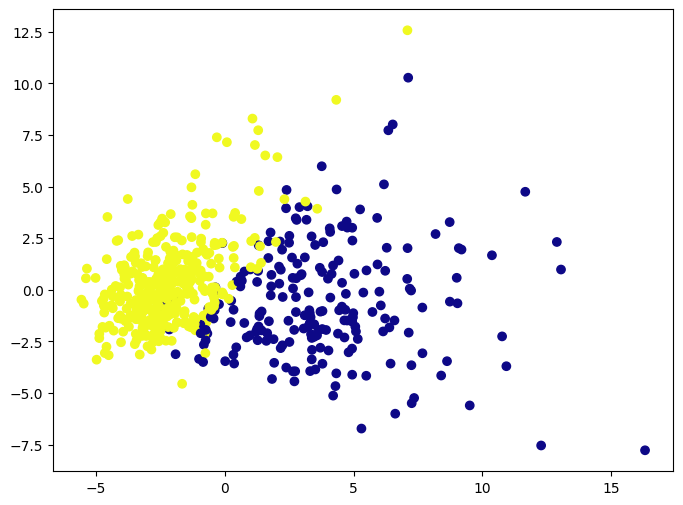

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(trans_pca[:,0],trans_pca[:,1],c=cancer['target'],cmap='plasma')

In [27]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(trans_pca,cancer['target'],test_size=0.40,random_state=40)

In [67]:
x_train.shape

(341, 2)

In [68]:
y_train.shape

(341,)

In [69]:
y_test.shape

(228,)

**Random Forest Algorithm**

In [70]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [79]:
rfc = RandomForestClassifier(n_estimators=100)

In [80]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
rfc_predict = rfc.predict(x_test)

In [82]:
accuracy_score(y_test,rfc_predict)*100

95.17543859649122

**Support vector Machine**

In [83]:
from sklearn.svm import SVC

In [86]:
svc = SVC()

In [87]:
svc.fit(x_train,y_train)

SVC()

In [88]:
predict = svc.predict(x_test)

In [89]:
svm_accuracy = accuracy_score(predict,y_test)

In [91]:
svm_accuracy*100

96.49122807017544

**Logesti Regression**

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()

In [95]:
lr.fit(x_train,y_train)

LogisticRegression()

In [97]:
predict = lr.predict(x_test)

In [98]:
lr_accuracy = accuracy_score(predict,y_test)

In [100]:
lr_accuracy*100

97.36842105263158